In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from pydataset import data

import statistics as stats

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = "https://gist.githubusercontent.com/ryanorsinger/6218f5731f3df7cb4771ff3879fdeaa3/raw/88cb6bed276e2236c33df011bd753b6c73832c30/quartet.csv"

df = pd.read_csv(url)


df.groupby("dataset").describe()

id                                                   x       ...  \
        count  mean       std   min   25%   50%   75%   max count mean  ...   
dataset                                                                 ...   
I        11.0   5.0  3.316625   0.0   2.5   5.0   7.5  10.0  11.0  9.0  ...   
II       11.0  16.0  3.316625  11.0  13.5  16.0  18.5  21.0  11.0  9.0  ...   
III      11.0  27.0  3.316625  22.0  24.5  27.0  29.5  32.0  11.0  9.0  ...   
IV       11.0  38.0  3.316625  33.0  35.5  38.0  40.5  43.0  11.0  9.0  ...   

                        y                                                      
          75%   max count      mean       std   min    25%   50%   75%    max  
dataset                                                                        
I        11.5  14.0  11.0  7.500909  2.031568  4.26  6.315  7.58  8.57  10.84  
II       11.5  14.0  11.0  7.500909  2.031657  3.10  6.695  8.14  8.95   9.26  
III      11.5  14.0  11.0  7.500000  2.030424  5.39  6.250  7.11  7.98  12.74  
IV        8.0  19.0  11.0  7.500909  2.030579  5.25  6.170  7.04  8.19  12.50  

[4 rows x 24 columns]

In [4]:
mycols = list(itertools.product(['x', 'y'], ['50%', 'mean', 'max', 'std']))

In [5]:
df.groupby("dataset").describe()[mycols]

x                          y                           
         50% mean   max       std   50%      mean    max       std
dataset                                                           
I        9.0  9.0  14.0  3.316625  7.58  7.500909  10.84  2.031568
II       9.0  9.0  14.0  3.316625  8.14  7.500909   9.26  2.031657
III      9.0  9.0  14.0  3.316625  7.11  7.500000  12.74  2.030424
IV       8.0  9.0  19.0  3.316625  7.04  7.500909  12.50  2.030579

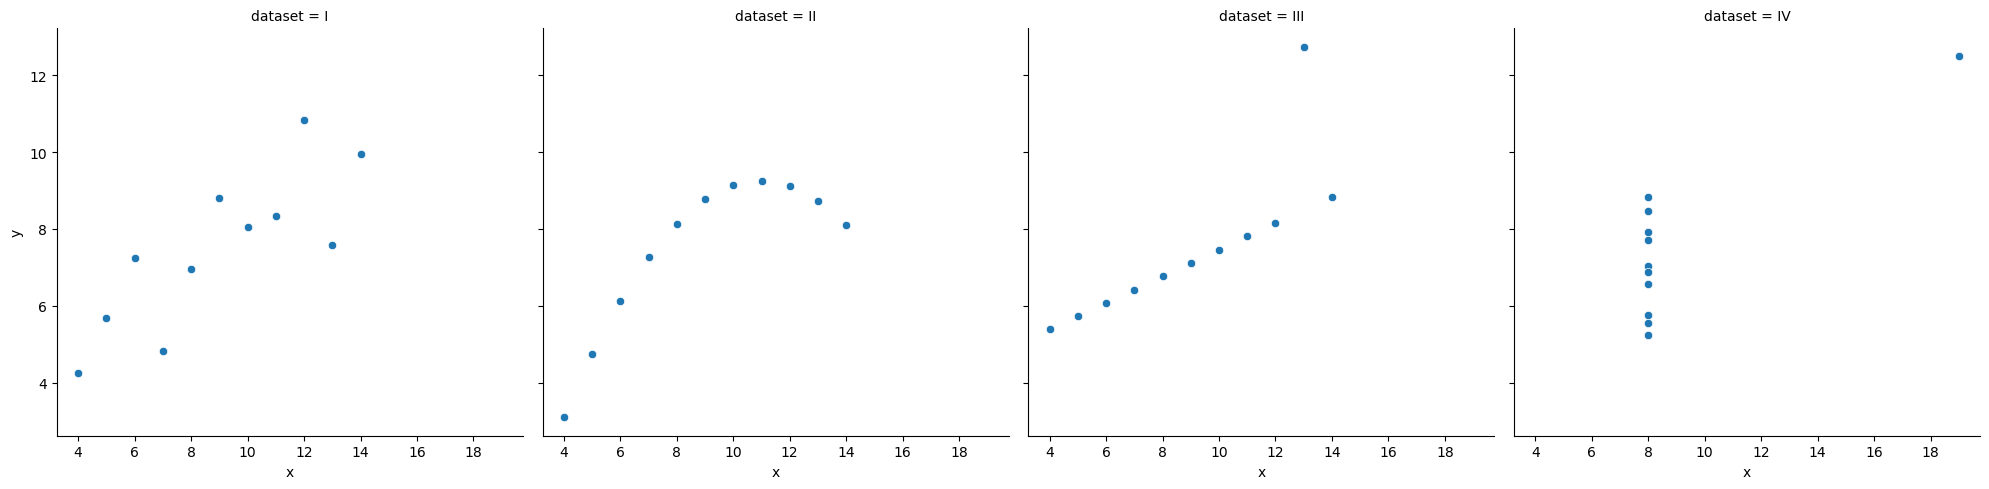

In [6]:
sns.relplot(x='x', y='y', col='dataset', data=df)

In [7]:
swiss = data('swiss')

In [8]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


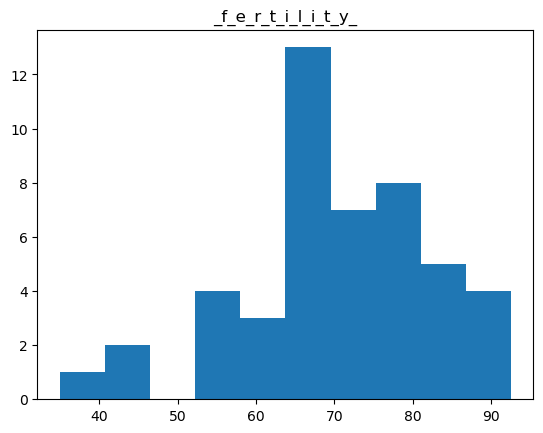

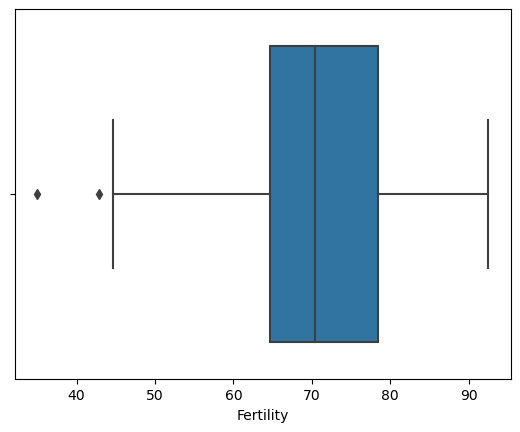

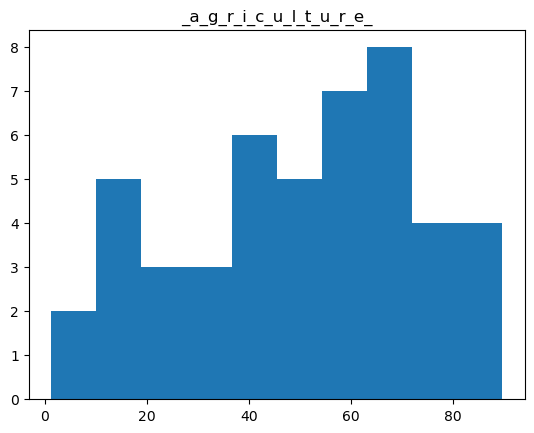

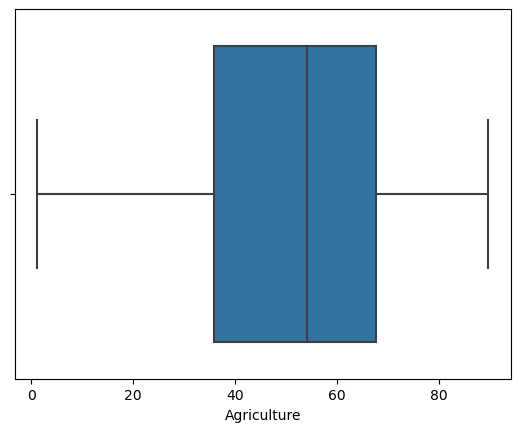

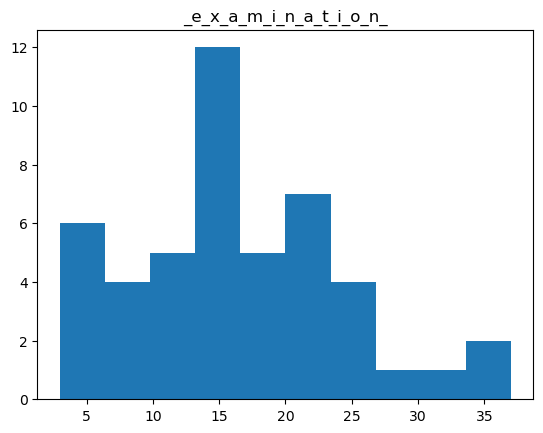

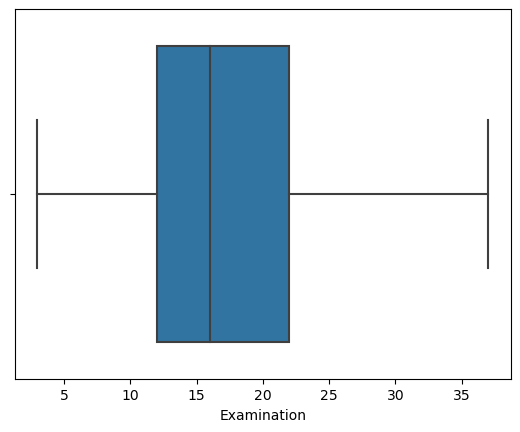

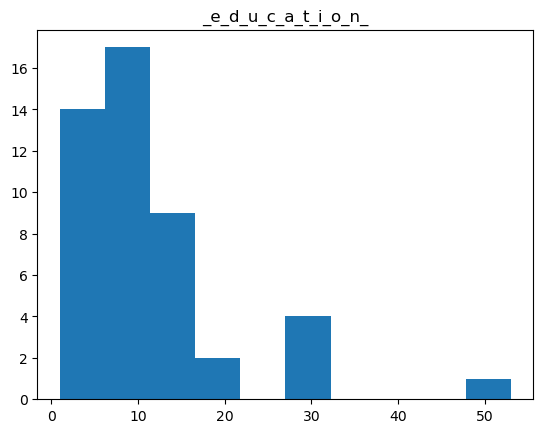

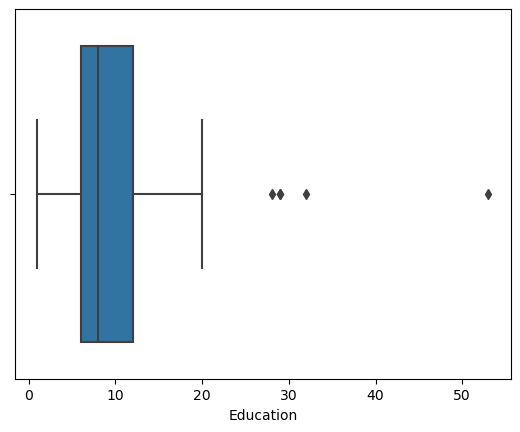

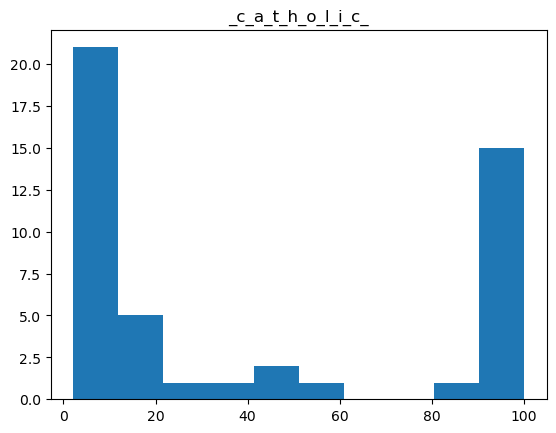

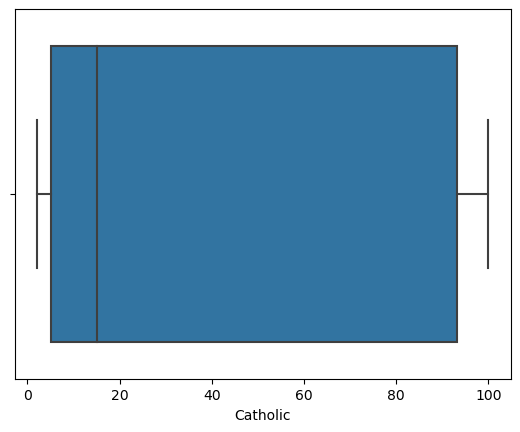

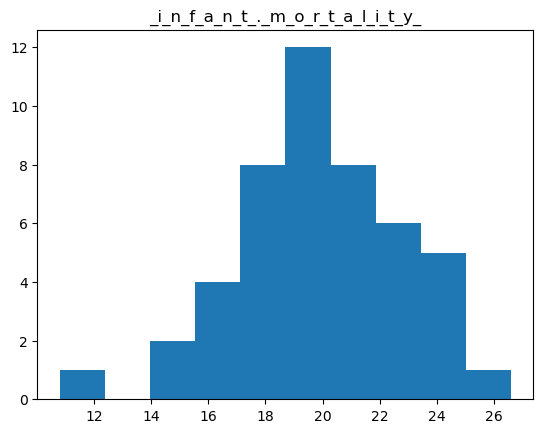

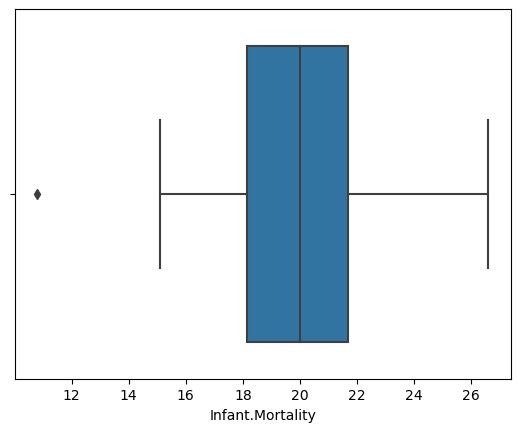

In [9]:
cols = swiss.columns.to_list()

for col in cols:
    plt.hist(swiss[col])
    plt.title(col.replace('','_').capitalize())
    plt.show()
    sns.boxplot(data=swiss, x = col)
    plt.show()

# Start Exercises

In [10]:
lemonade = pd.read_csv('lemonade.csv')

In [53]:
def get_upper_and_lower_bounds(x, k):
    ''' 
    This function takes in a series, the threshold a series of the outliers.
    ''' 
    outliers = []
    q1, q3 = x.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr   # get upper bound
    lower_bound = q1 - k * iqr

    for i in x:
        if i > upper_bound or i < lower_bound:
            outliers.append(i)
    
    outliers =np.asarray(outliers)
        # return dataframe without outliers
            
    return outliers

In [54]:
lemonade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [55]:
col = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

In [56]:
get_upper_and_lower_bounds(lemonade['Temperature'], 1.5)

array([212. ,  15.1])

In [61]:
get_upper_and_lower_bounds(lemonade['Rainfall'], 1.5)

array([2.  , 1.33, 1.33, 1.54, 1.54, 1.54, 1.33, 1.33, 1.67, 1.43, 1.43,
       1.54, 1.33, 1.33, 1.54, 1.82, 1.43, 1.82, 1.33, 1.43, 1.54, 1.33,
       1.43, 1.33, 1.54, 1.43, 1.43, 2.5 ])

In [59]:
get_upper_and_lower_bounds(lemonade['Flyers'], 1.5)

array([212. ,  15.1])

In [62]:
get_upper_and_lower_bounds(lemonade['Price'], 1.5)

array([], dtype=float64)

In [63]:
get_upper_and_lower_bounds(lemonade['Sales'], 1.5)

array([143, 158, 235, 534])

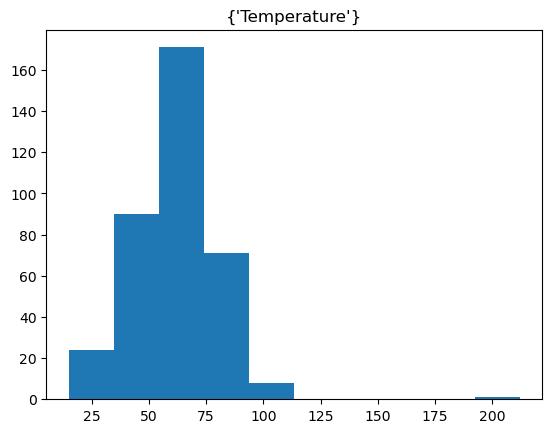

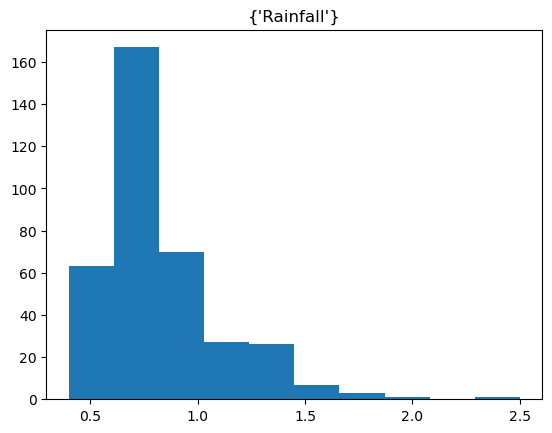

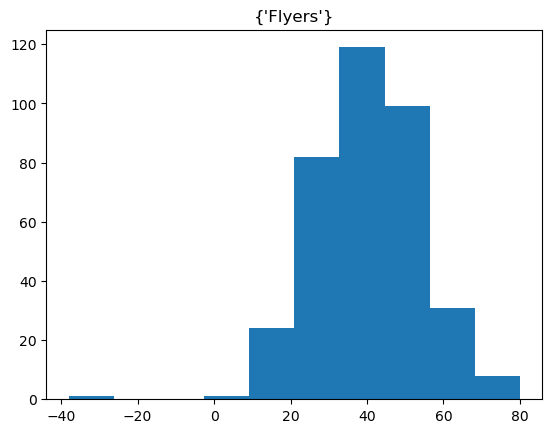

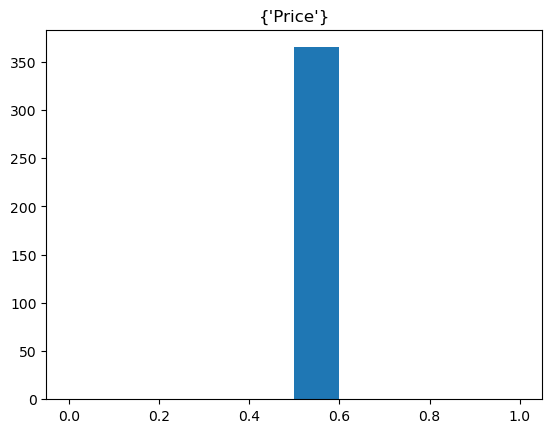

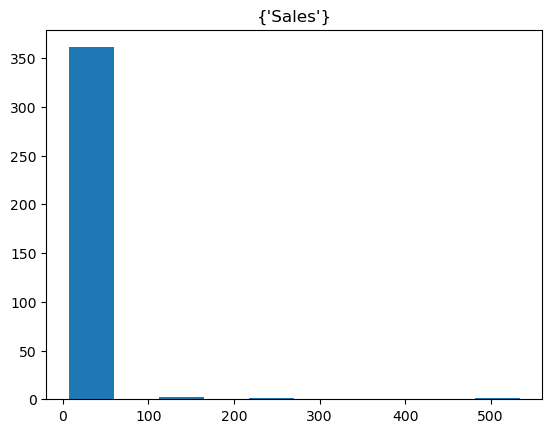

In [67]:
for x in col:
    plt.hist(lemonade[x])
    plt.title({x})
    plt.show()

In [71]:
stats.stdev(lemonade['Temperature'])

18.085892298302607

In [73]:
lemonade.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
Rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
Flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
Price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
Sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


In [74]:
lemonade.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000
